# ***Voorspellen van verhuuraantallen 2023*** 

Teamleden:
- Busse Heemskerk
- Declan van den Hoek
- Isa Dijkstra

In dit notebook worden er, aan de hand van een train dataset, verschillende Machine Learning modellen opgesteld om de meest accurate manier te vinden om verhuuraantallen te voorspellen.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_test = pd.read_csv('test.csv', sep = ',')
data_train = pd.read_csv('train.csv', sep = ',')

In [2]:
data_train

,date_hour,holiday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01 00:00:00,0,1,0.24,0.2879,0.81,0.0000,16
1,2011-01-01 01:00:00,0,1,0.22,0.2727,0.80,0.0000,40
2,2011-01-01 02:00:00,0,1,0.22,0.2727,0.80,0.0000,32
3,2011-01-01 03:00:00,0,1,0.24,0.2879,0.75,0.0000,13
4,2011-01-01 04:00:00,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...
16632,2012-11-30 19:00:00,0,1,0.32,0.3485,0.66,0.0000,377
16633,2012-11-30 20:00:00,0,1,0.32,0.3485,0.66,0.0000,245
16634,2012-11-30 21:00:00,0,1,0.30,0.3182,0.75,0.0896,183
16635,2012-11-30 22:00:00,0,1,0.30,0.3333,0.75,0.0000,163


## **H1: Explorative Data Analysis**<a name='h1'></a>

De minimale vereisten voor Machine Learning met Scikit Learn zijn:

- De data mag geen missende waardes hebben
- De data moet bestaan uit numerieke waardes
- De data moet in een dataframe staan

Omdat de data is ingelezen via Pandas staat het al in een Pandas DataFrame, hierdoor kan gebruik gemaakt worden van de .info() methode van DataFrames om te kijken naar missende waarden en de datatypen.

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_hour   16637 non-null  object 
 1   holiday     16637 non-null  int64  
 2   weathersit  16637 non-null  int64  
 3   temp        16637 non-null  float64
 4   atemp       16637 non-null  float64
 5   hum         16637 non-null  float64
 6   windspeed   16637 non-null  float64
 7   cnt         16637 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 1.0+ MB


In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_hour   456 non-null    object 
 1   holiday     456 non-null    int64  
 2   weathersit  456 non-null    int64  
 3   temp        456 non-null    float64
 4   atemp       456 non-null    float64
 5   hum         456 non-null    float64
 6   windspeed   456 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 25.1+ KB


In [5]:
data_train.describe()

,holiday,weathersit,temp,atemp,hum,windspeed,cnt
count,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000
mean,0.028671,1.415580,0.504745,0.482608,0.624756,0.190310,190.477009
std,0.166885,0.637298,0.192369,0.171557,0.193227,0.121915,182.026755
min,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.340000,0.333300,0.470000,0.104500,41.000000
50%,0.000000,1.000000,0.520000,0.500000,0.620000,0.194000,143.000000
75%,0.000000,2.000000,0.660000,0.621200,0.780000,0.253700,282.000000
max,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [6]:
correlaties = data_train.corr()
display(correlaties)

,holiday,weathersit,temp,atemp,hum,windspeed,cnt
holiday,1.000000,-0.019912,-0.026707,-0.030552,-0.013474,0.005341,-0.026586
weathersit,-0.019912,1.000000,-0.093937,-0.097251,0.411523,0.030847,-0.140111
temp,-0.026707,-0.093937,1.000000,0.987475,-0.062933,-0.026461,0.409245
atemp,-0.030552,-0.097251,0.987475,1.000000,-0.046192,-0.063077,0.404820
hum,-0.013474,0.411523,-0.062933,-0.046192,1.000000,-0.284617,-0.327288
windspeed,0.005341,0.030847,-0.026461,-0.063077,-0.284617,1.000000,0.097006
cnt,-0.026586,-0.140111,0.409245,0.404820,-0.327288,0.097006,1.000000


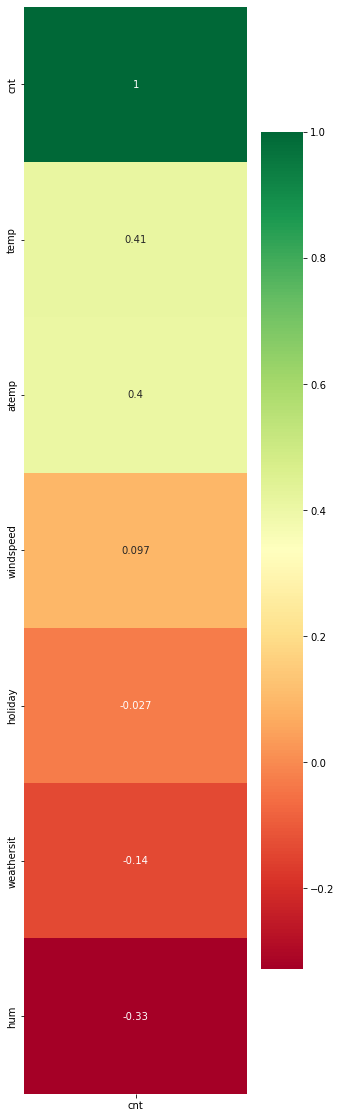

In [7]:
fig, ax = plt.subplots(figsize=(5,20))
ax = sns.heatmap(data_train.corr()[['cnt']].sort_values(by=['cnt'],ascending=False),square=False, annot=True, cmap='RdYlGn')
data_train.sort_index(axis=0, ascending=True)
plt.show()

Aan de hand van deze heatmap kun je zien dat de hum, temp en atemp de meeste invloed hebben op de hoeveelheid die wordt verhuurd. 

In [5]:
df_train = data_train.copy()
df_train.drop('date_hour', axis=1, inplace=True)
#ik heb date_hour verwijderd want her duurde heel lang met runnen en voor de visualisaties die hier onder komen heeft deze geen
#zin. deze heeft wel zin denk ik als we alles bij elkaar voegen want dan hebben we ook periodes. Ik leg dit op school wel ff uit. 

In [9]:
def boxplots(df, kolom):
    """
    Maakt een aantal box plots gelijk aan het aantal kolommen
    in de Dataframe. De box zijn tegen één specifieke kolom
    opgezet, om de verdeling t.o.v. die kolom te tonen.

    Parameters:
    ----------------
    df : Pandas DataFrame
        Een pandas DataFrame met kolommen waarvan je
        de verdeling wilt onderzoeken.

    kolom : str
        De naam van de kolom waarbij de verdeling bekeken
        word, ten opzichte van de andere kolommen.

    Returns:
    ---------------
    None :
        In plaats van iets te returnen laat de
        functie meerdere boxplots zien.
    """

    # For-loop om elke kolom een eigen boxplot te geven
    for col in df.columns:
        # if-statement om te voorkomen dat de
        # kolom-parameter ook een boxplot krijgt
        if col != kolom:
            # Zetten van de grootte van de plot
            plt.subplots(figsize=(15, 5))

            # Maken en benoemen van de assen van de boxplots
            sns.boxplot(x=col, y=kolom,
                        data=df, color='pink')
            plt.xlabel(col)
            plt.ylabel(kolom)
            plt.title('{} vs. {}'.format(kolom, col))
            plt.show()
            
def barplots(df, kolom):
    """
    Maakt een aantal bar plots gelijk aan het aantal kolommen
    in de Dataframe. De bar is tegen één specifieke kolom
    opgezet, om de verdeling t.o.v. die kolom te tonen.

    Parameters:
    ----------------
    df : Pandas DataFrame
        Een pandas DataFrame met kolommen waarvan
        je de verdeling wilt onderzoeken.

    kolom : str
        De naam van de kolom waarbij de verdeling
        bekeken word, ten opzichte van de andere kolommen.

    Returns:
    ---------------
    None :
        In plaats van iets te returnen laat
        de functie meerdere barplots zien.
    """

    # For-loop om elke kolom een eigen barplot te geven
    for col in df.columns:
        # if-statement om te voorkomen dat de
        # kolom-parameter ook een barplot krijgt
        if col != kolom:
            # Zetten van de grootte van de plot
            plt.subplots(figsize=(15, 5))

            # Maken en benoemen van de assen van de barplot
            sns.barplot(x=col, y=kolom,
                        data=df, color= 'skyblue')
            plt.xlabel(col)
            plt.ylabel(kolom)
            plt.title('{} vs. {}'.format(col, kolom))
            plt.show()
            
def lineplots(df, kolom):
    """
    Maakt een aantal line plots gelijk aan het aantal kolommen
    in de Dataframe. De line is tegen één specifieke kolom
    opgezet, om de verdeling t.o.v. die kolom te tonen.

    Parameters:
    ----------------
    df : Pandas DataFrame
        Een pandas DataFrame met kolommen waarvan
        je de verdeling wilt onderzoeken.

    kolom : str
        De naam van de kolom waarbij de verdeling
        bekeken word, ten opzichte van de andere kolommen.

    Returns:
    ---------------
    None :
        In plaats van iets te returnen laat
        de functie meerdere lineplots zien.
    """

    # For-loop om elke kolom een eigen barplot te geven
    for col in df.columns:
        # if-statement om te voorkomen dat de
        # kolom-parameter ook een barplot krijgt
        if col != kolom:
            # Zetten van de grootte van de plot
            plt.subplots(figsize=(15, 5))

            # Maken en benoemen van de assen van de barplot
            sns.lineplot(x=col, y=kolom,
                        data=df, color= 'green')
            plt.xlabel(col)
            plt.ylabel(kolom)
            plt.title('{} vs. {}'.format(col, kolom))
            plt.show()

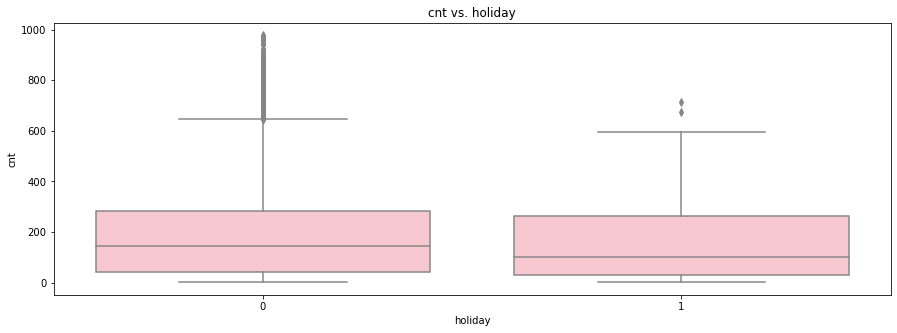

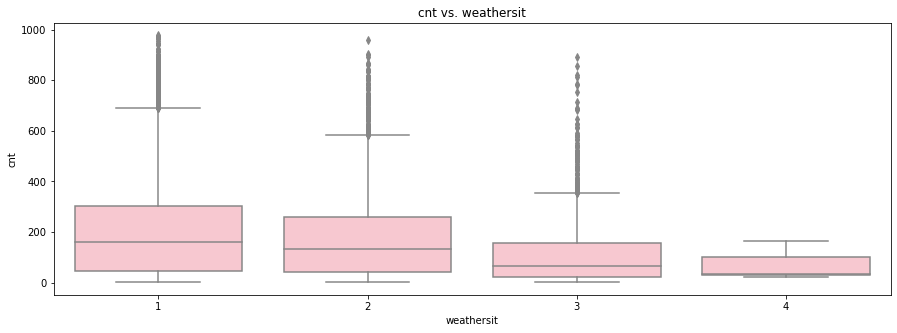

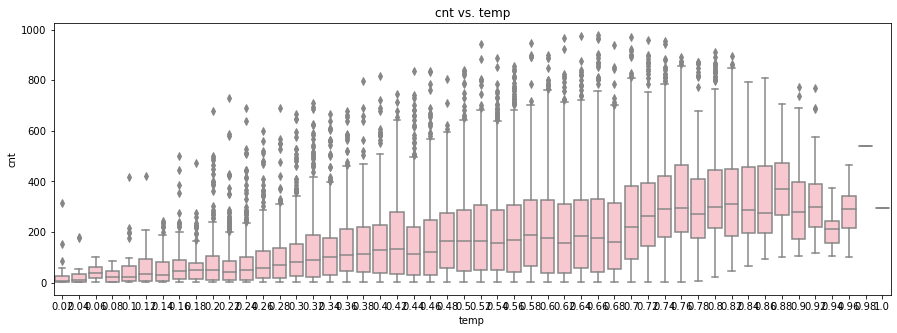

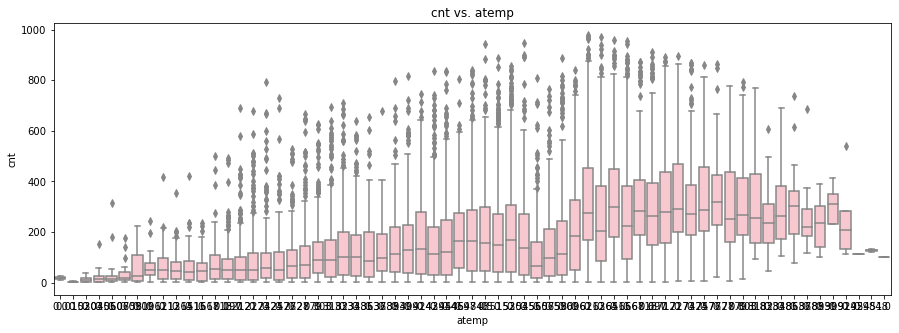

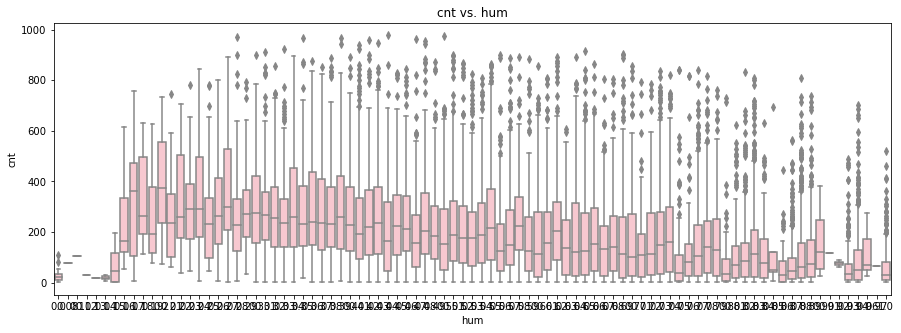

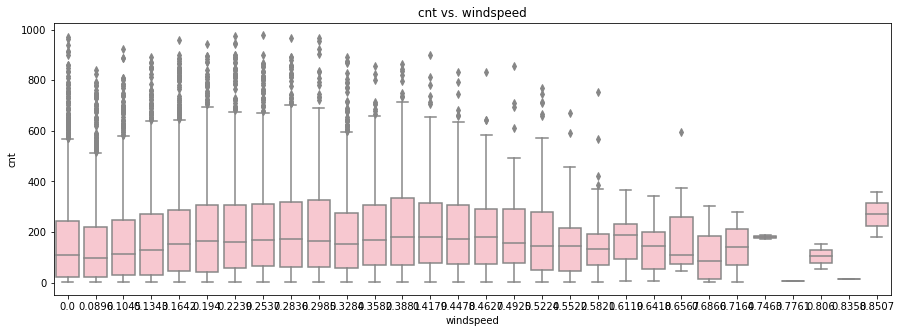

In [12]:
boxplots(df_train, 'cnt')

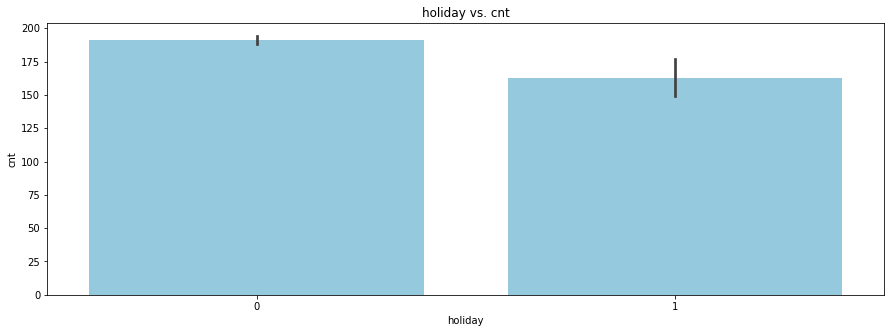

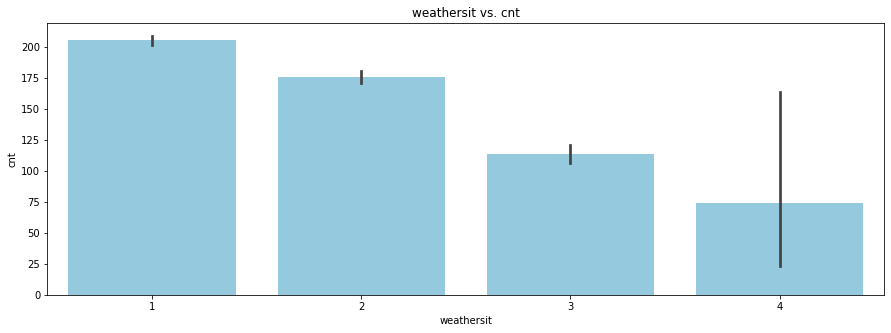

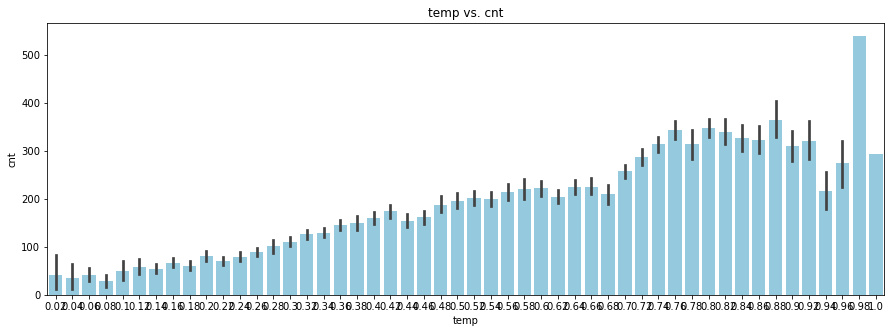

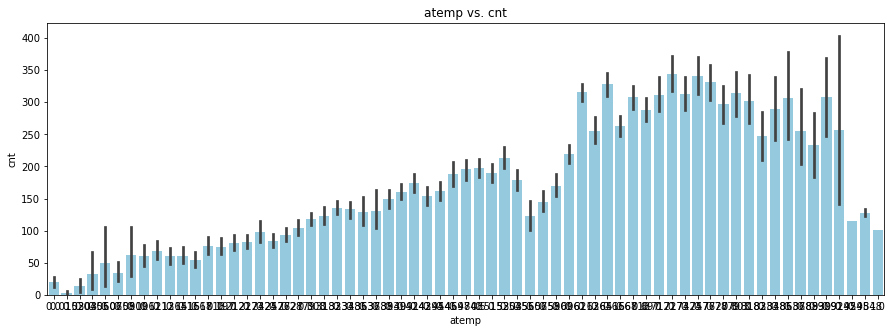

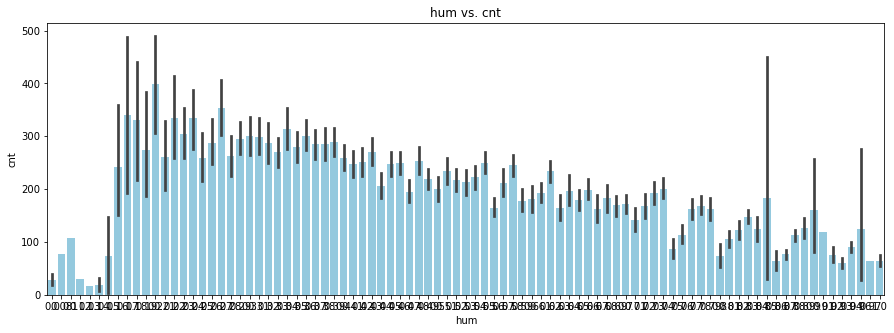

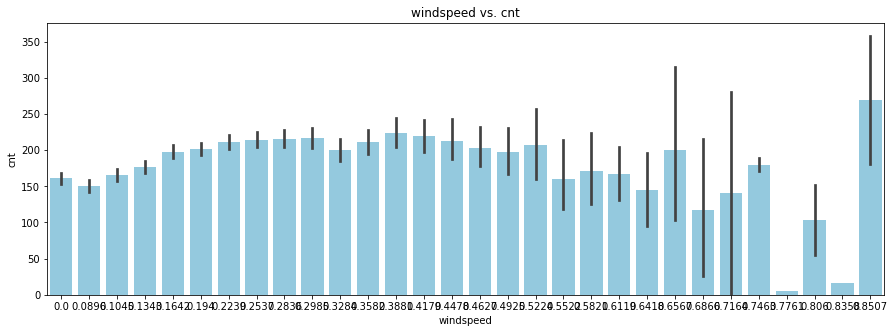

In [13]:
barplots(df_train, 'cnt')

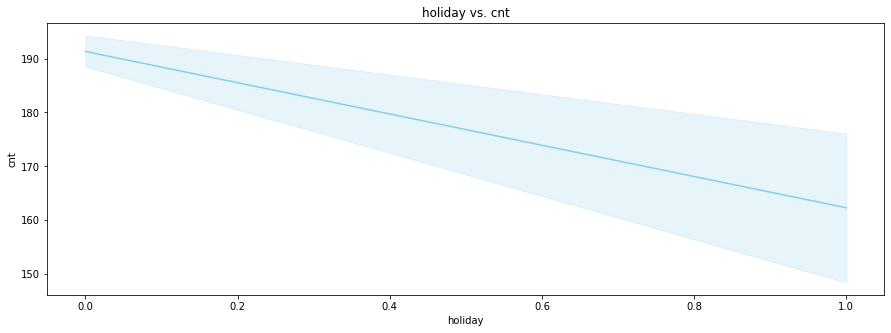

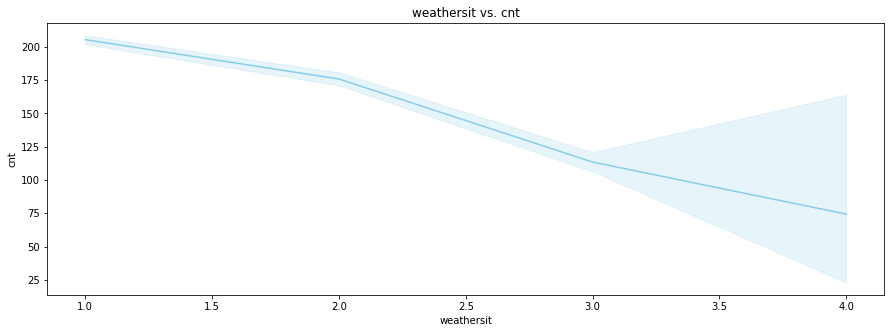

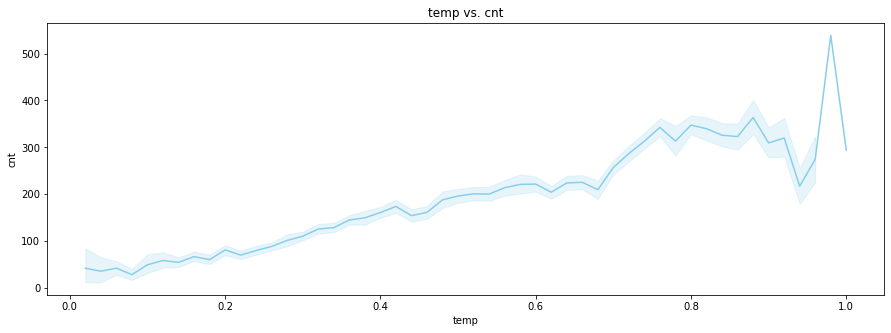

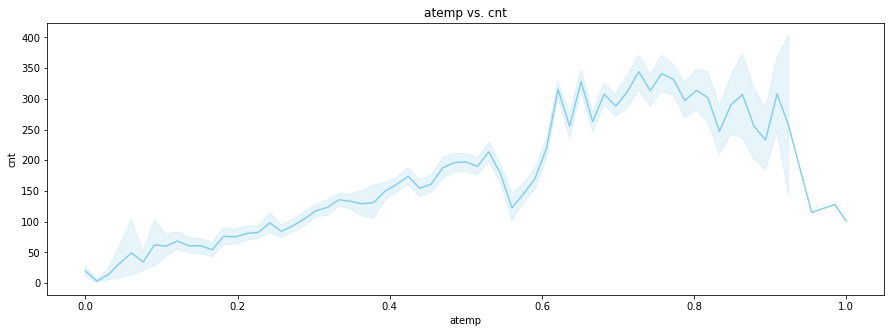

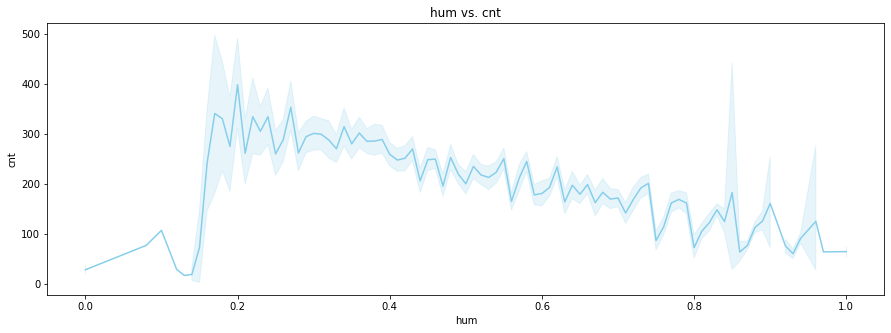

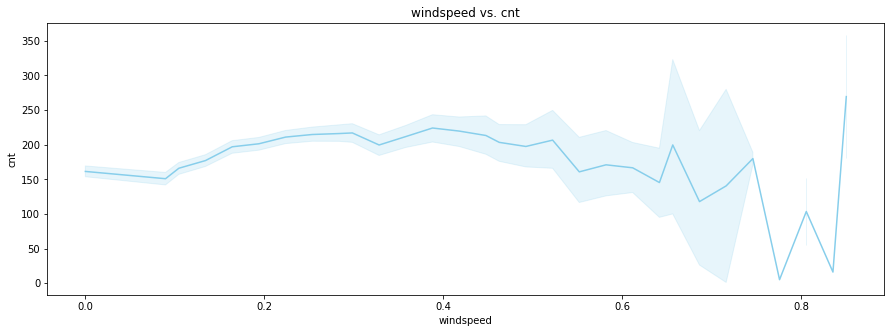

In [20]:
lineplots(df_train, 'cnt')

In de visualisaties kun je zien dat holiday (0) zorgt voor meer verhuuraantallen van het product. Ook zie je dat hoe hoger de weathersite, hoe meer er van het product wordt verhuurd. Ook zie je een stijgende lijn in de temperatuur en de verhuurde aantallen. Windspeed loopt geleidelijk met een paar uitschieters. Hum loopt juist af, dus een lagere hum zorgt voor meer verhuur, maar de hum moet ook weer niet te laag zijn want dan verhuur je bijna niks. 

#ik vind zelf de boxplots niet zo mooi hierbij, wat vinden jullie?


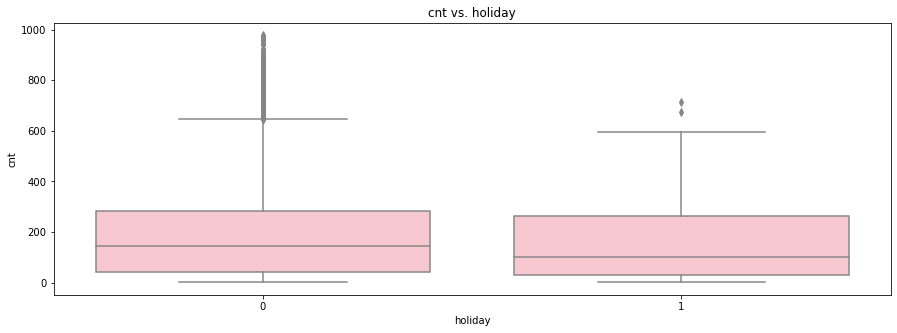

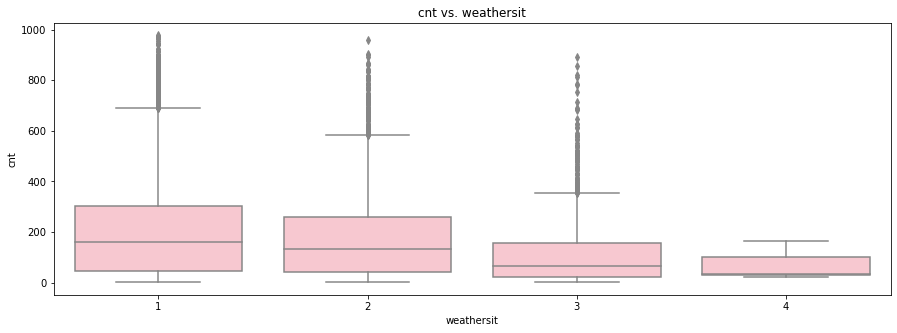

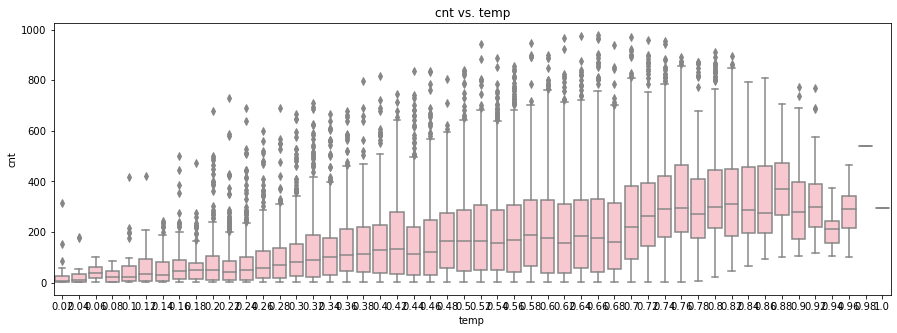

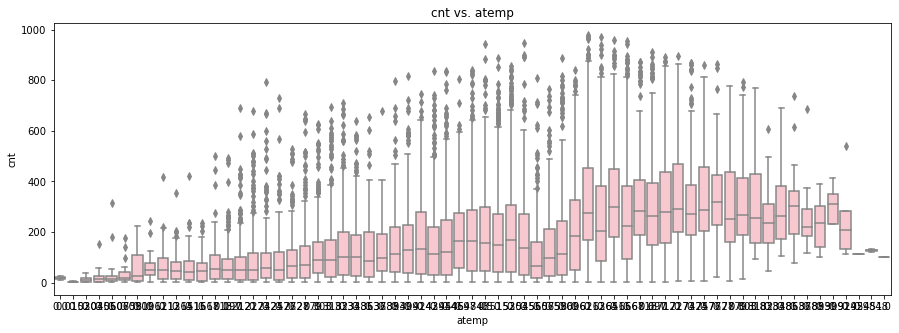

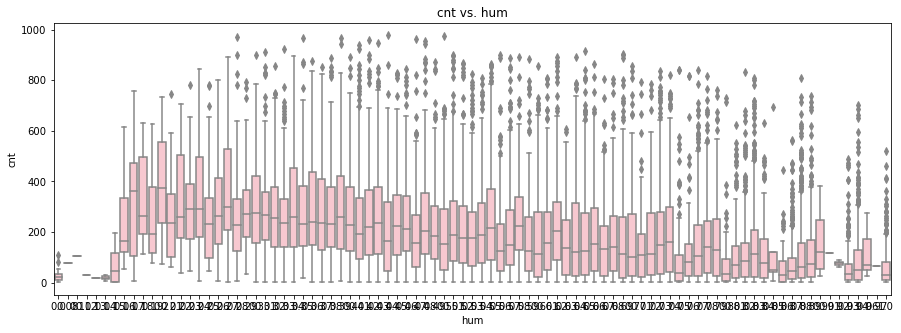

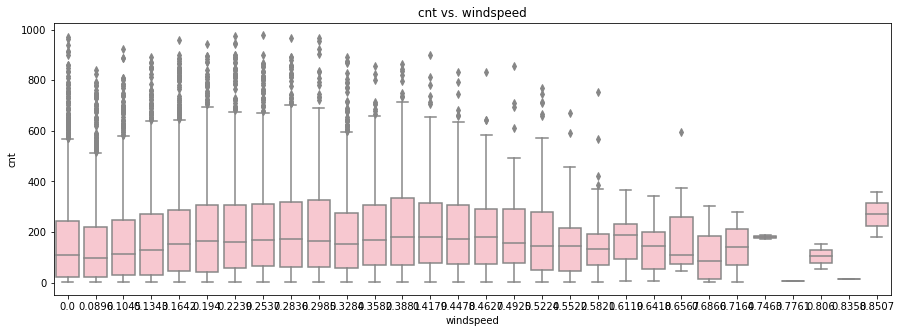

None


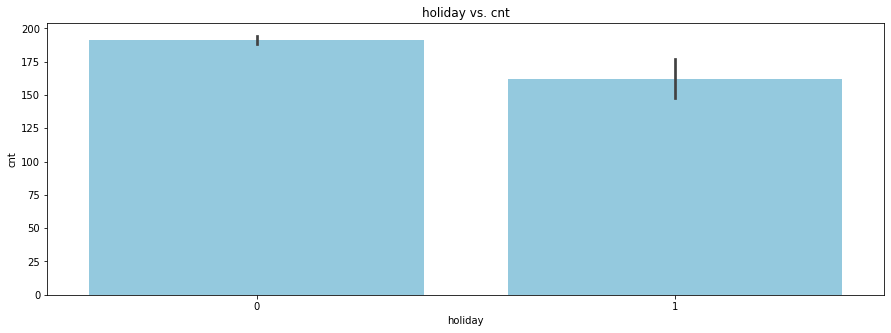

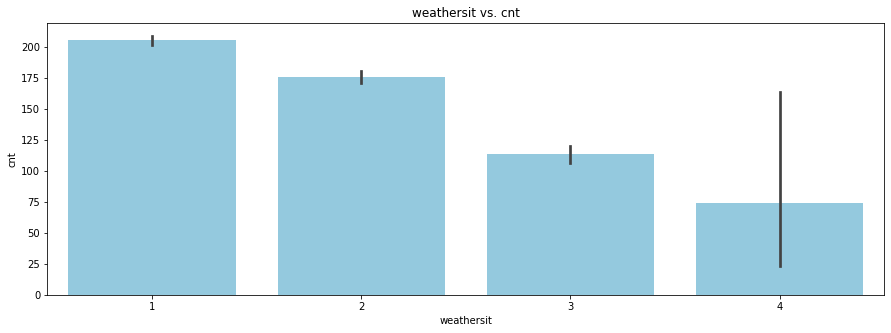

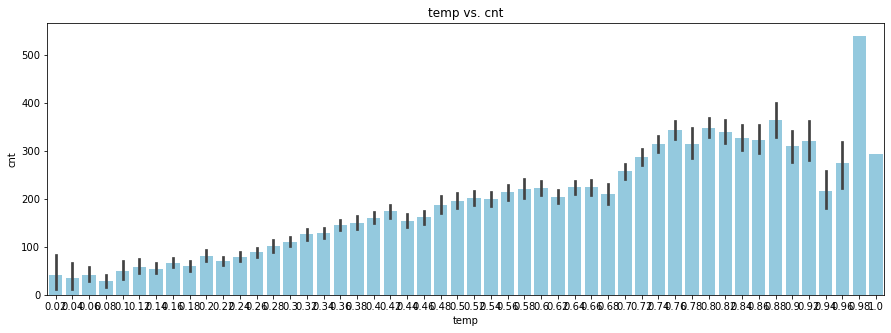

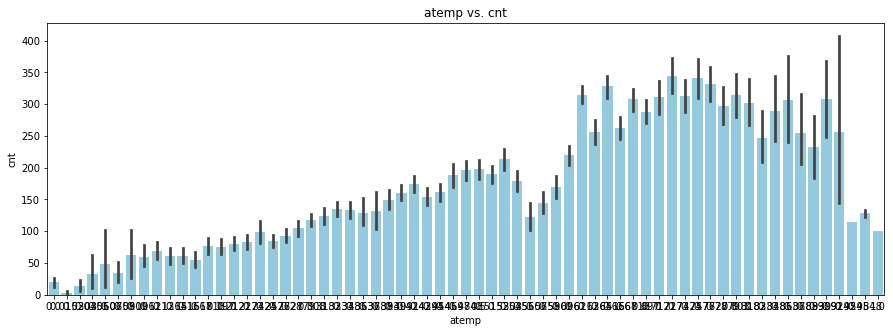

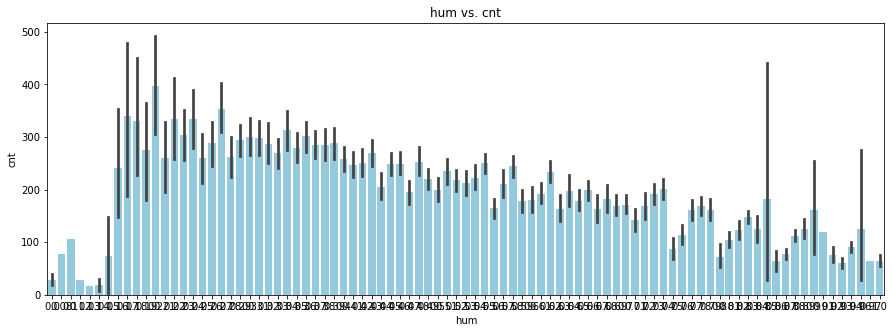

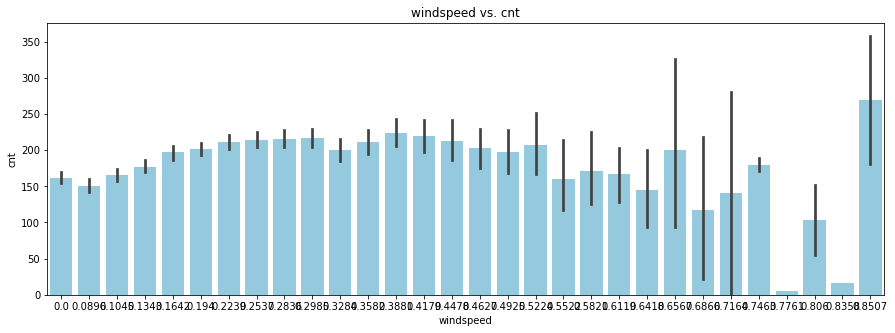

None


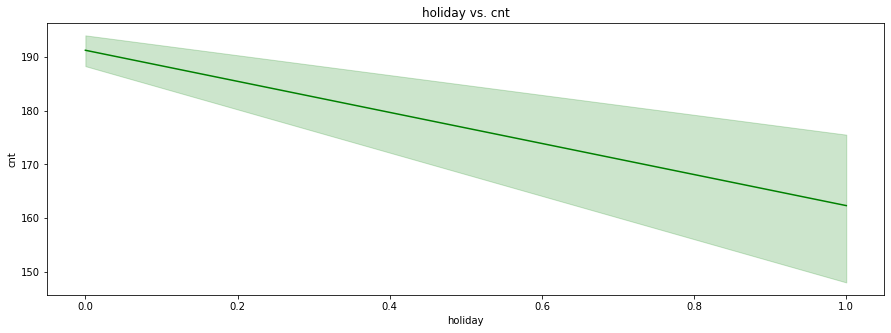

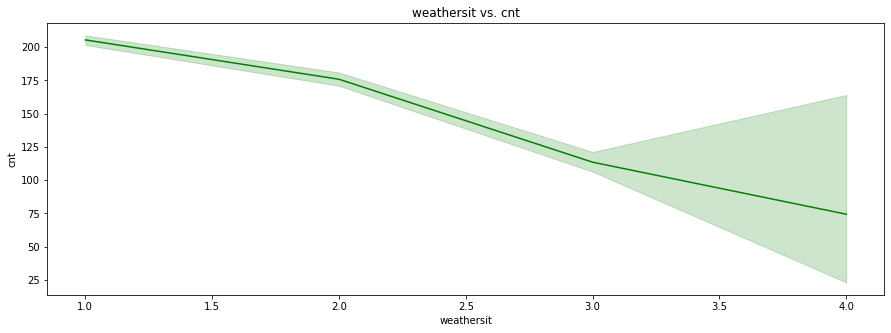

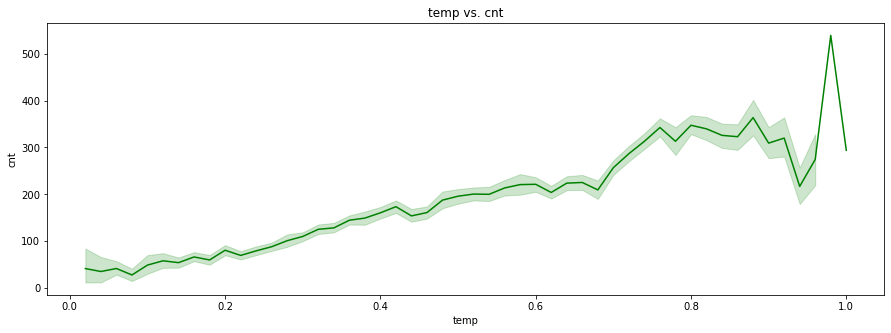

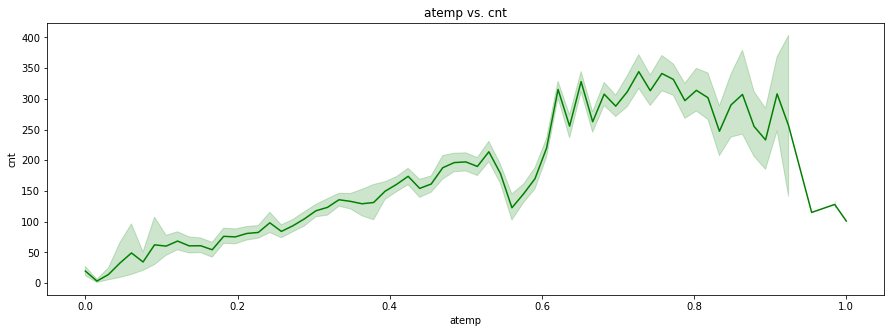

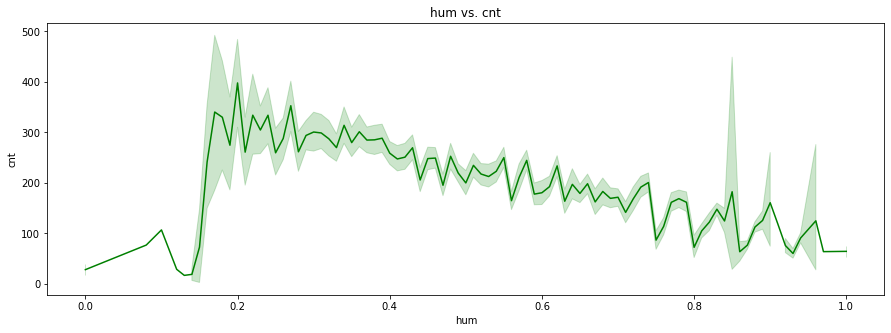

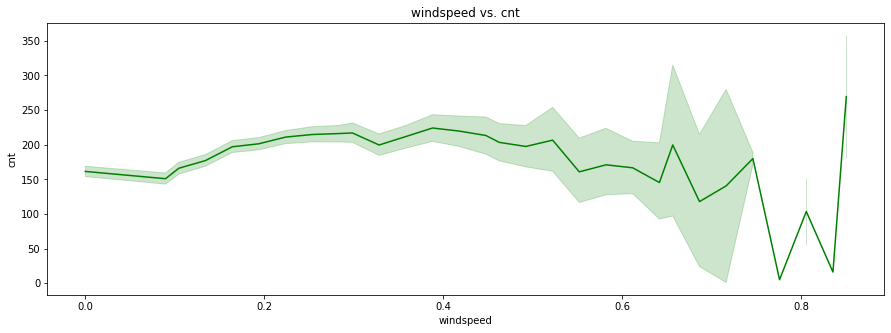

None


In [23]:
print(boxplots(df_train, 'cnt'))
print(barplots(df_train, 'cnt'))
print(lineplots(df_train, 'cnt'))

In [6]:
from sklearn.model_selection import train_test_split

X = df_train.drop('cnt', axis=1)
y = df_train['cnt']

# Toepassen van train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    test_size=0.2)

In [7]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

cv = RepeatedStratifiedKFold(n_splits=5, 
                             n_repeats=3, 
                             random_state=42)

def grid_score(estimator, param_grid):
    """
    Een functie die de scores voor een grid search
    berekend en deze toont. Hierbij worden ook de
    optimale parameters getoont.

    Parameters:
    ----------
    estimator : ML model
    Het model waarop de grid search wordt toegepast

    param_grid : dict
    Een dictionary waarbij de keys parameter namen
    zijn van het model en de values verschillende
    waarden die de parameter aan kan nemen.

    Returns:
    ----------
    None
    Returned twee prints met de optimale parameters
    en beste f1 score
    """

    # Uitvoeren van de grid search
    gs = GridSearchCV(estimator=estimator,
                    param_grid=param_grid,
                    cv=cv,
                    scoring='f1',
                    n_jobs=-1)
    
    # Fitten van de grid search
    gs.fit(X_train, y_train)

    # Tonen van de beste score en parameters
    print(f"Beste f1: {gs.best_score_}")
    print(f"Beste parameters:\n{gs.best_params_}")

# Opdracht 3 modelleren

### **H3.1: Lineaire Regressie** <a name='h3.1'></a>

#### **De werking van lineaire regressie** 
De waarde van een afhankelijke variabele voorspellen op basis van een of meer onafhankelijke variabelen. De formule van lineare regressie is y = b0 + b1x

#### **Loss functie**

Een loss functie is een manier om te meten hoe goed een lineair regressiemodel de gegevens beschrijft. Het is een functie die de fout of afwijking tussen de werkelijke uitvoer en de voorspelde uitvoer kwantificeert. Een veelgebruikte loss functie voor lineaire regressie is de mean squared error (MSE) functie, die het gemiddelde van de kwadraten van de fouten berekent. Hoe kleiner de MSE, hoe beter het model de gegevens past. RMSE



Nu het duidelijk is wat lineaire Regressie inhoud, kan er een model worden opgesteld.

In [14]:
from sklearn.linear_model import LinearRegression

modellr = LinearRegression()
modellr.fit(X_train, y_train)

y_pred = modellr.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R-squared (R2): {r2}")

R-squared (R2): 0.26221683784545946


In [15]:
param_lr = {
    'fit_intercept': [True, False],
    'copy_X' : [True, False],
    'n_jobs' : [None, -1, 1],
    'positive' : [False, True]
}

 
# Uitvoeren van Grid Search CV
grid_score(modellr, param_lr)

C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Beste f1: nan
Beste parameters:
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


### **H3.2: Decision tree regressor** <a name='h3.1'></a>


In [8]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

modeldtr = DecisionTreeRegressor(random_state=42)  # random_state voor reproduceerbare resultaten
modeldtr.fit(X_train, y_train)
y_pred = modeldtr.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R-squared (R2): {r2}")

R-squared (R2): -0.10576366010139604


In [ ]:
param_dtr = {
    'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'random_state': [42]
}
    
# Uitvoeren van Grid Search CV
grid_score(modeldtr, param_dtr)

C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


# autocorrelatie

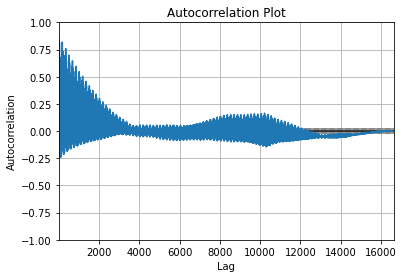

In [2]:
# Importeer de benodigde bibliotheken
import pandas as pd
import matplotlib.pyplot as plt

ts = pd.Series(data_train['cnt'])

# Gebruik autocorrelation_plot om de autocorrelatie te visualiseren
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ts)
plt.title("Autocorrelation Plot")
plt.show()


# sarimax


In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create a DataFrame representing bike rental data
data = {
    'Date': pd.date_range(start='2023-01-01', periods=365, freq='D'),
    'Hour': np.tile(np.arange(24), 15),  # 15 days of data, 24 hours each
    'Temperature(C)': np.random.uniform(10, 35, 365 * 24),
    'Humidity(%)': np.random.uniform(30, 90, 365 * 24),
    'Wind_Speed(kmph)': np.random.uniform(5, 25, 365 * 24),
    'Rental_Count': np.random.randint(0, 50, 365 * 24)
}

bike_rental_df = pd.DataFrame(data)

test = data_train.copy()

# Feature Engineering for Autocorrelation
lag = 24  # Set the lag for daily autocorrelation
test['Lag_1'] = test['cnt'].shift(lag)

# Feature Engineering for Cyclic Patterns
bike_rental_df['DayOfWeek'] = bike_rental_df['Date'].dt.dayofweek
bike_rental_df['MonthOfYear'] = bike_rental_df['Date'].dt.month

# Split the data into training and testing sets
train_size = int(0.8 * len(bike_rental_df))
train_data = bike_rental_df.iloc[:train_size]
test_data = bike_rental_df.iloc[train_size:]

# Train a linear regression model using lag and cyclic features
X_train = train_data[['Lag_1', 'DayOfWeek', 'MonthOfYear']]
y_train = train_data['Rental_Count']
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
X_test = test_data[['Lag_1', 'DayOfWeek', 'MonthOfYear']]
y_test = test_data['Rental_Count']
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error (MSE) as the evaluation metric
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.4f}')

# Plot the true values and predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], y_test, label='True Values', color='blue')
plt.plot(test_data['Date'], y_pred, label='Predicted Values', color='red')
plt.legend()
plt.title('Bike Rental Forecasting with Autocorrelation and Cyclic Features')
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.show()


ValueError: All arrays must be of the same length

In [22]:
test = data_train.copy()

# Feature Engineering for Autocorrelation
lag = 24  # Set the lag for daily autocorrelation
test['Lag_1'] = test['cnt'].shift(lag)

test

,date_hour,holiday,weathersit,temp,atemp,hum,windspeed,cnt,Lag_1
0,2011-01-01 00:00:00,0,1,0.24,0.2879,0.81,0.0000,16,NaN
1,2011-01-01 01:00:00,0,1,0.22,0.2727,0.80,0.0000,40,NaN
2,2011-01-01 02:00:00,0,1,0.22,0.2727,0.80,0.0000,32,NaN
3,2011-01-01 03:00:00,0,1,0.24,0.2879,0.75,0.0000,13,NaN
4,2011-01-01 04:00:00,0,1,0.24,0.2879,0.75,0.0000,1,NaN
...,...,...,...,...,...,...,...,...,...
16632,2012-11-30 19:00:00,0,1,0.32,0.3485,0.66,0.0000,377,344.0
16633,2012-11-30 20:00:00,0,1,0.32,0.3485,0.66,0.0000,245,252.0
16634,2012-11-30 21:00:00,0,1,0.30,0.3182,0.75,0.0896,183,208.0
16635,2012-11-30 22:00:00,0,1,0.30,0.3333,0.75,0.0000,163,151.0
